In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyEyeSim import EyeData

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'test2.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))

(52, 9)


In [77]:

sizeX,sizeY=100,100


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid')

dataset size:  (52, 9)
presentation size:  x= 100 pixels y= 100  pixels
presentation size:  x= 100 pixels y= 100  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 4 subjects, and 1 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  4 observers and  1  stimuli.
Mean fixation number:  13.0  +/-  4.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  4
Mean X location:  41.5  +/-  2.4  pixels
Mean Y location:  49.3  +/-  0.4  pixels
Mean saccade  amplitude:  8.2  +/-  2.9  pixels
Mean scanpath  length:  85.1  +/-  7.5  pixels


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


In [78]:

sizeX,sizeY=100,100


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid')

dataset size:  (52, 9)
presentation size:  x= 100 pixels y= 100  pixels
presentation size:  x= 100 pixels y= 100  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 4 subjects, and 1 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  4 observers and  1  stimuli.
Mean fixation number:  13.0  +/-  4.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  4
Mean X location:  41.5  +/-  2.4  pixels
Mean Y location:  49.3  +/-  0.4  pixels
Mean saccade  amplitude:  8.2  +/-  2.9  pixels
Mean scanpath  length:  85.1  +/-  7.5  pixels


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


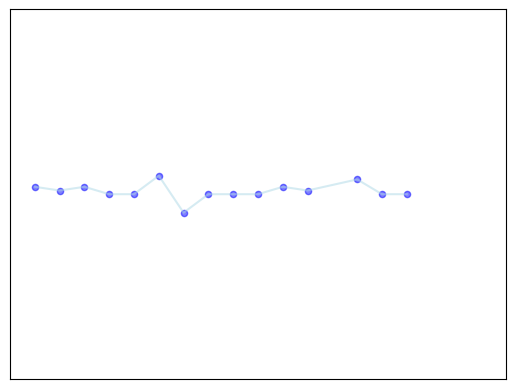

In [79]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=0)

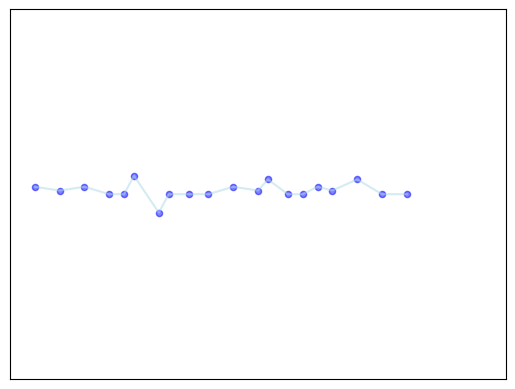

In [80]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=1)

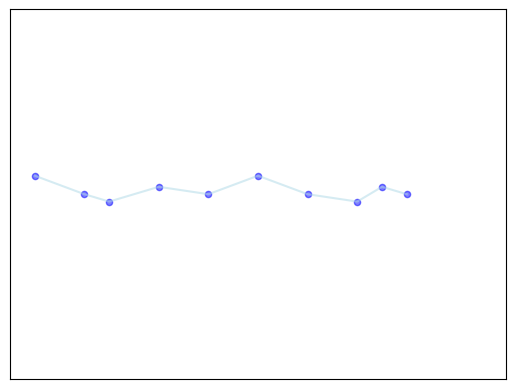

In [81]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=2)

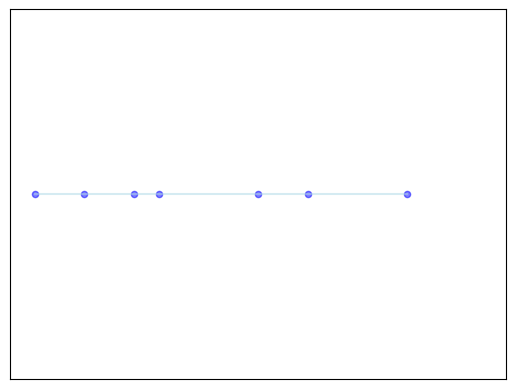

In [82]:
DyslexiaDat.VisScanPath(0,visFix=True,scan_path_col='lightblue', allS=3)

In [83]:
SaccadeObj = DyslexiaDat.GetSaccades()

In [84]:
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1, minL=0)

In [105]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', Thr=0)

In [106]:
SimMatrix.shape

(4, 4, 1, 1, 1)

In [107]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.19838579389522237
Similarity(1,3): 0.1697873548918234
Similarity(1,4): 0.11362167369276585
Similarity(2,3): 0.19433030565344958
Similarity(2,4): 0.14632259060060473
Similarity(3,4): 0.12739447851383942


In [108]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')

Similarity(3,4): 0.12739447851383942
Similarity(1,4): 0.11362167369276585
Similarity(2,4): 0.14632259060060473


(sim(3,4) << sim(1,4) < sim(2,4)) = Not True

---

In [102]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', Thr=0, match=True)

In [103]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.2998039506944742
Similarity(1,3): 0.4716789474476214
Similarity(1,4): 0.6533456033252897
Similarity(2,3): 0.5980395083927301
Similarity(2,4): 0.7969406940334427
Similarity(3,4): 0.44384517247675925


In [104]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')

Similarity(3,4): 0.44384517247675925
Similarity(1,4): 0.6533456033252897
Similarity(2,4): 0.7969406940334427


(sim(3,4) << sim(1,4) < sim(2,4)) = True -> Q.E.D.

---

In [109]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=5)

In [110]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.7892800282301352
Similarity(1,3): 0.32998316455372223
Similarity(1,4): 0.7302967433402215
Similarity(2,3): 0.26943012562182544
Similarity(2,4): 0.7453559924999299
Similarity(3,4): 0.0


In [111]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')

Similarity(3,4): 0.0
Similarity(1,4): 0.7302967433402215
Similarity(2,4): 0.7453559924999299


(sim(3,4) << sim(1,4) < sim(2,4)) = True -> Q.E.D.

Even if cosine similarity is much more drastic, considering the scanpath 3 and 4 the same (similarity 0.0), is not ideal.

In [114]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=20)

In [116]:
print(f'Similarity(1,2): {SimMatrix[0][1][0][0][0]}')
print(f'Similarity(1,3): {SimMatrix[0][2][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,3): {SimMatrix[1][2][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')

Similarity(1,2): 0.9203579866168446
Similarity(1,3): 0.6040095911547237
Similarity(1,4): 0.8485281374238569
Similarity(2,3): 0.6646690829713778
Similarity(2,4): 0.8677218312746249
Similarity(3,4): 0.3713906763541037


In [115]:
print(f'Similarity(3,4): {SimMatrix[2][3][0][0][0]}')
print(f'Similarity(1,4): {SimMatrix[0][3][0][0][0]}')
print(f'Similarity(2,4): {SimMatrix[1][3][0][0][0]}')

Similarity(3,4): 0.3713906763541037
Similarity(1,4): 0.8485281374238569
Similarity(2,4): 0.8677218312746249


Anyway, is possible to modifing the threshold to find the optimal one that fit your case.